In [68]:
import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

plt.rcParams['figure.figsize'] = [12, 8]

In [69]:
df = pd.read_pickle('data/Run179_head.h2g_header_info.pkl')

df

,packet_number,fpga_ip,fpga_port,udp_tx_counter,data_pointer,payloads_validated,first_aa5a_position
0,0,209,249,18779492,923,7,0
1,1,209,249,18779493,2281,7,0
2,2,209,249,18779494,3639,7,0
3,3,208,249,18915740,4997,7,0
4,4,209,249,18779495,6355,7,0
...,...,...,...,...,...,...,...
1048571,1048571,208,249,19440050,1423960341,7,0
1048572,1048572,208,249,19440051,1423961699,7,0
1048573,1048573,208,249,19440052,1423963057,7,0
1048574,1048574,208,249,19440053,1423964415,7,0


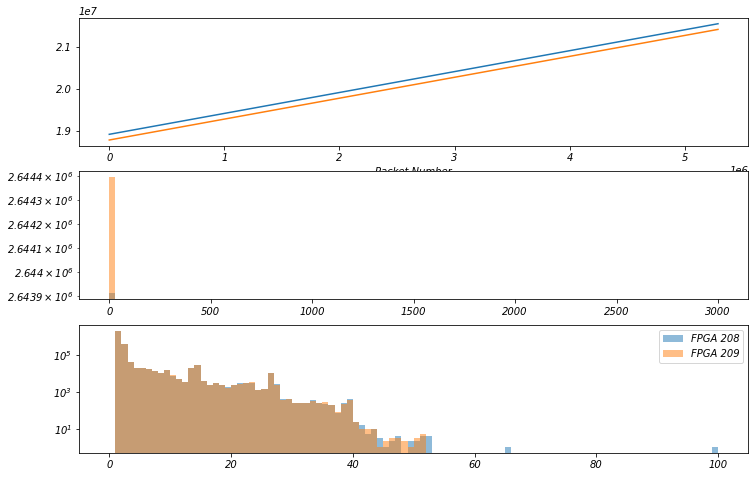

In [62]:
fig, [ax0, ax1, ax2] = plt.subplots(3,1)
for fpga_id, dft in df. groupby('fpga_ip'):
    ax0.plot(dft['packet_number'], dft['udp_tx_counter'], label=f'FPGA {fpga_id}')
    ax1.hist(dft['udp_tx_counter'].diff().dropna(), bins = 100, range = (0, 3000), alpha=0.5, label=f'FPGA {fpga_id}')
    ax2.hist(dft['packet_number'].diff().dropna(), bins = 100, range = (0, 100), alpha=0.5, label=f'FPGA {fpga_id}') 
    ax1.set_yscale('log')
    ax2.set_yscale('log')
ax0.set_xlabel('Packet Number')

plt.legend()

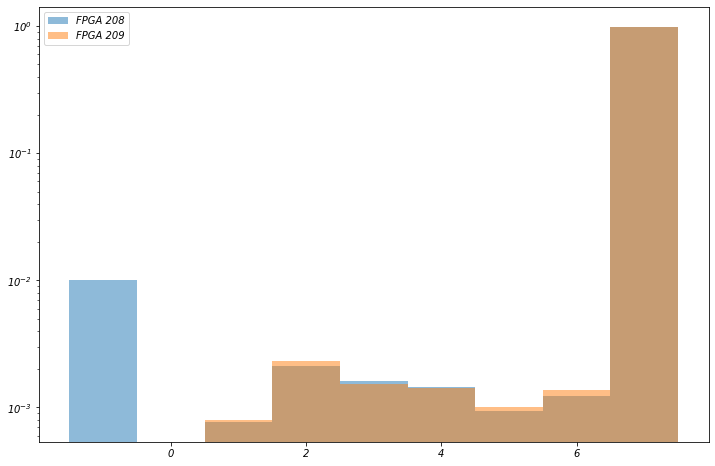

In [63]:
fig, ax0 = plt.subplots(1,1)
for fpga_id, dft in df. groupby('fpga_ip'):
    ax0.hist(dft['payloads_validated'], range = (-1.5, 7.5), bins = 9, alpha=0.5, label=f'FPGA {fpga_id}', density=True)

ax0.set_yscale('log')

plt.legend()

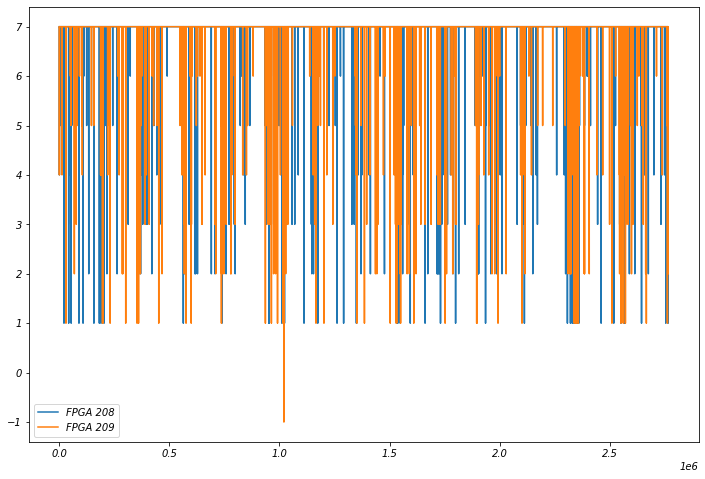

In [60]:
for fpga_id, dft in df. groupby('fpga_ip'):
    plt.plot(dft['packet_number'], dft['payloads_validated'], label=f'FPGA {fpga_id}')

plt.legend()

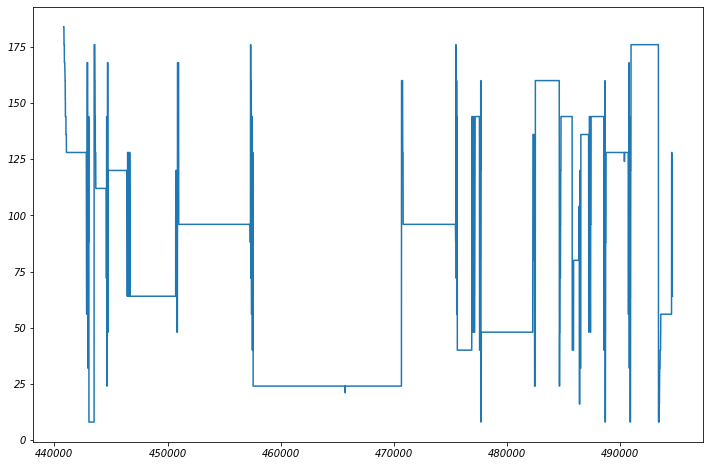

In [ ]:
dft = df[df['first_aa5a_position'] != 0]

plt.plot(dft['packet_number'], dft['first_aa5a_position'])

plt.xlabel('Packet Number')
plt.ylabel('Position of AA5A magic word in first Payload of Packet')